In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Import dataframes, merge

In [182]:
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1', error_bad_lines=False, sep=';')
users = pd.read_csv('BX-Users.csv', encoding='latin-1', error_bad_lines=False, sep=';')
books = df = pd.read_csv('BX-Books.csv', encoding='latin-1', error_bad_lines=False, sep=';')

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_8480\4054739283.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1', error_bad_lines=False, sep=';')
C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_8480\4054739283.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('BX-Users.csv', encoding='latin-1', error_bad_lines=False, sep=';')
C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_8480\4054739283.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = df = pd.read_csv('BX-Books.csv', encoding='latin-1', error_bad_lines=False, sep=';')
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 

# Users EDA

In [183]:
users

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [184]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Location - data visualisation and transformation

In [185]:
# Separate location into city, country and state
users[['City', 'Country', 'State']] = users['Location'].str.split(', ', 2, expand=True)

In [186]:
users.drop('Location', axis=1, inplace=True)

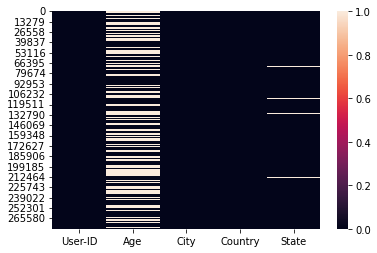

In [187]:
# Visualise NaN values
sns.heatmap(users.isnull())
plt.show()

In [188]:
# Sum of NaN values
users.isnull().sum()

User-ID         0
Age        110762
City            0
Country         1
State        4577
dtype: int64

In [189]:
# Drop NaN values from states
users.dropna(subset=['State'], inplace=True)

### Display top cities, countries, states

In [190]:
users_category = users.select_dtypes('object')

In [191]:
users_category.head(3)

City          Country   State
0       nyc         new york     usa
1  stockton       california     usa
2    moscow  yukon territory  russia

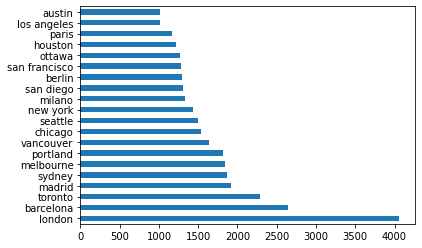

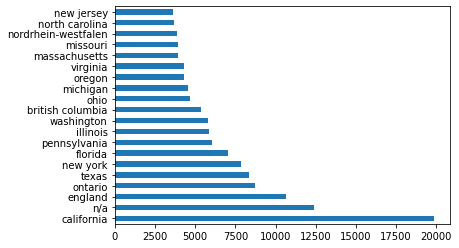

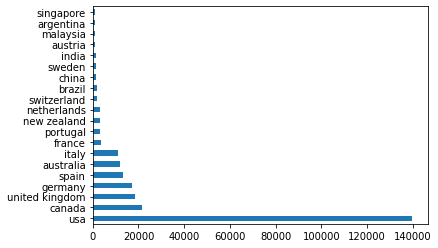

In [192]:
for col in users_category.columns:
    plt.subplots(1) 
    users_category[col].value_counts()[:20].plot(kind='barh')
    print('')

## Age - data visualisation and transformation

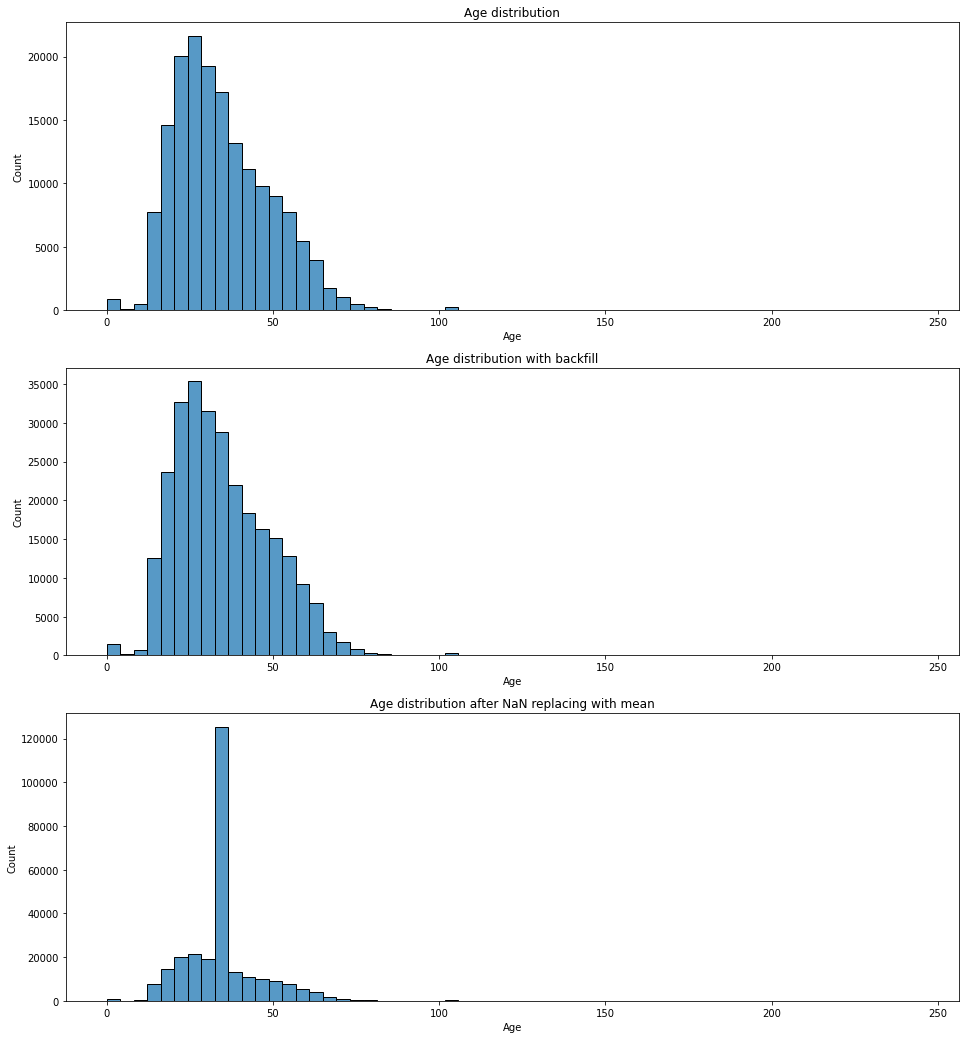

In [193]:
plt.figure(figsize=(16, 18))
plt.subplot(3, 1, 1)
sns.histplot(users['Age'], bins=60)
plt.title('Age distribution')

plt.subplot(3, 1, 2)
sns.histplot(users['Age'].fillna(method='backfill'), bins=60)
plt.title('Age distribution with backfill')

plt.subplot(3, 1, 3)
sns.histplot(users['Age'].fillna(users['Age'].mean()), bins=60)
plt.title('Age distribution after NaN replacing with mean')
plt.show()

Using backfill distribution hasn't changed, because values were duplicated

In [194]:
users.drop(users[(users['Age']  < 8) | (users['Age']  > 80)].index, inplace=True)

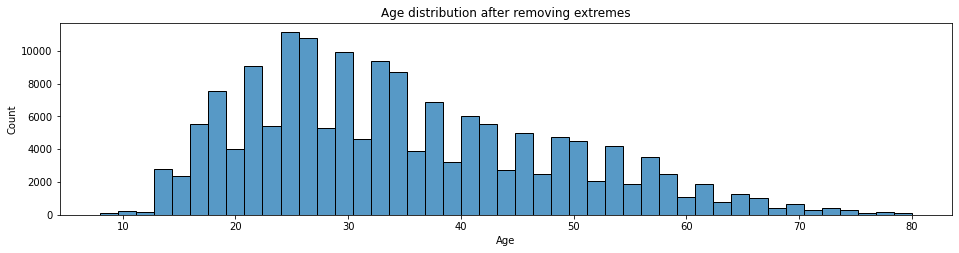

In [195]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 1, 1)
sns.histplot(users['Age'], bins=45)
plt.title('Age distribution after removing extremes')
plt.show()

# Books EDA 

In [196]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [197]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Publisher - data visualsation and transformation

In [198]:
publishers_rating = pd.DataFrame(books['Publisher'].value_counts())

In [199]:
# Scale publisher according to occurence
publishers_rating['Publishers_frequency'] = books['Publisher'].value_counts().values / books['Publisher'].value_counts().max()
publishers_rating['Publisher'] = publishers_rating.index

In [200]:
books = pd.merge(publishers_rating, books, on=["Publisher"])

In [201]:
publishers_rating['Publisher']

Harlequin                                Harlequin
Silhouette                              Silhouette
Pocket                                      Pocket
Ballantine Books                  Ballantine Books
Bantam Books                          Bantam Books
                                    ...           
Hannover House                      Hannover House
Amber Quill Press, LLC.    Amber Quill Press, LLC.
Lunchbox Press                      Lunchbox Press
Ugly Town                                Ugly Town
Connaught                                Connaught
Name: Publisher, Length: 16807, dtype: object

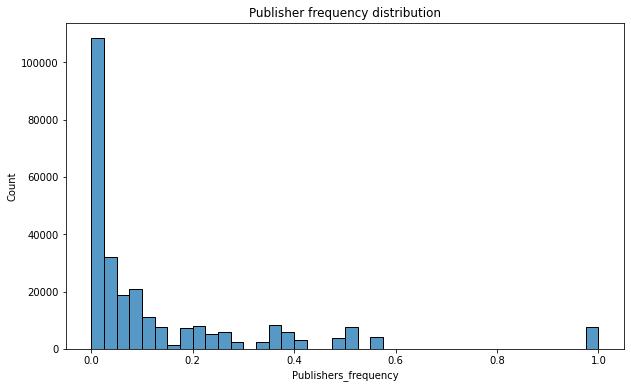

In [202]:
plt.figure(figsize=(10, 6))
sns.histplot(books['Publishers_frequency'], bins=40)
plt.title('Publisher frequency distribution')
plt.show()

## Year of publication - data visualisation and transformation

In [203]:
# Drop strange values
books.drop(books[books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])].index, inplace=True)

In [204]:
# Check dtype of Year of publication 
print(books['Year-Of-Publication'].dtypes)

object


In [205]:
# Recast values to numeric
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [206]:
# Check values from year of publication 
books['Year-Of-Publication'].value_counts().index.sort_values()

Int64Index([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906,
            ...
            2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050],
           dtype='int64', length=116)

In [207]:
higher_years = (books['Year-Of-Publication' ] > 2010).sum()
lower_years = (books['Year-Of-Publication' ] < 1950).sum()
print(f' Count of books published below 1950 is {lower_years} and above 2010 is {higher_years}')

 Count of books published below 1950 is 4911 and above 2010 is 20


In [208]:
# Drop high and low values
books.drop(books[(books['Year-Of-Publication']  < 1950) | (books['Year-Of-Publication']  > 2010) | (books['Year-Of-Publication']  == 0)].index, inplace=True)

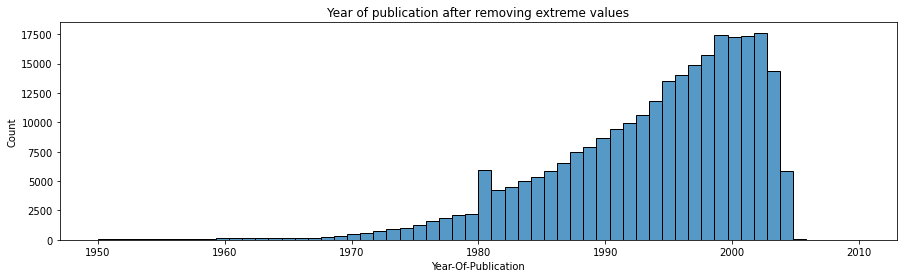

In [209]:
plt.figure(figsize=(15,4))
sns.histplot(books['Year-Of-Publication'], bins=58)
plt.title('Year of publication after removing extreme values')
plt.show()

## Most common authors

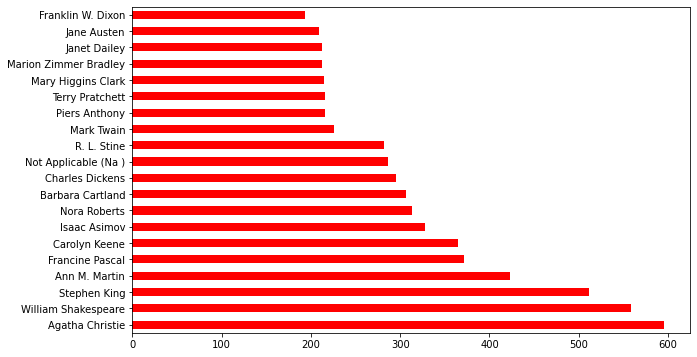

In [210]:
plt.figure(figsize=(10, 6))
books['Book-Author'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

# Ratings EDA

## Book Rating - visualisation and transformation

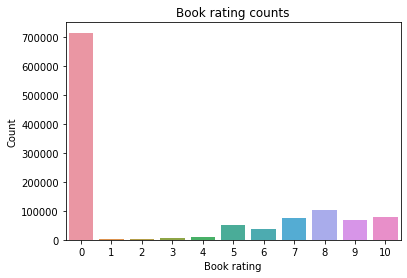

In [211]:
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Book rating counts')
plt.xlabel('Book rating')
plt.ylabel('Count')
plt.show()

In [212]:
# Drop 0
ratings.drop(ratings[ratings['Book-Rating'] == 0].index, inplace=True)

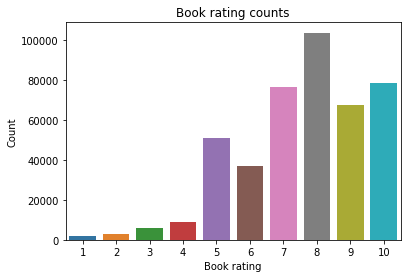

In [213]:
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Book rating counts')
plt.xlabel('Book rating')
plt.ylabel('Count')
plt.show()

### Activity of users visualisation

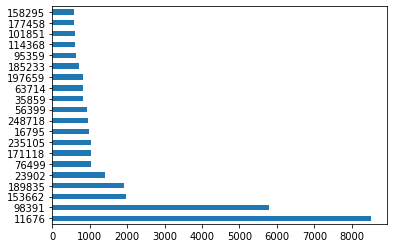

In [214]:
# User 11676 was proactive
ratings['User-ID'].value_counts()[:20].plot(kind='barh')
plt.show()

### Count average rating of the books

In [215]:
ratings['ISBN'].value_counts()

0316666343     707
0971880107     581
0385504209     487
0312195516     383
0679781587     333
              ... 
0140441905       1
0886777267       1
0671697951       1
0553560956       1
05162443314      1
Name: ISBN, Length: 185973, dtype: int64

In [216]:
# Keep ratings where book has at least 3 ratings
ratings = ratings[ratings['ISBN'].map(ratings['ISBN'].value_counts()) > 2]

In [217]:
ratings.groupby(['ISBN'])['Book-Rating', 'User-ID'].mean()

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_8480\379212821.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratings.groupby(['ISBN'])['Book-Rating', 'User-ID'].mean()


Book-Rating        User-ID
ISBN                                      
0 907 062 008     10.000000  113309.666667
0/330/25864/8      9.250000   75447.000000
0000000000         7.600000   73182.600000
0000000000000      7.666667  181793.333333
0001055666         7.000000  111063.333333
...                     ...            ...
B00005WN5U         5.000000   79922.000000
B00009EF82         8.666667  113994.000000
B0000AA9IZ         9.333333  140585.000000
O67174142X         7.333333  182565.666667
\0432534220\""     6.666667   83545.000000

[30091 rows x 2 columns]

In [218]:
# Mean rating of the book
mean_book_rating = pd.DataFrame(ratings.groupby(['ISBN'])['Book-Rating'].mean().reset_index())

In [219]:
books = pd.merge(books, mean_book_rating, on='ISBN')

In [220]:
books = books.rename(columns={'Book-Rating':'Book-Average-Rating'})

### Count average rating of the author

In [221]:
author_rating = pd.merge(ratings, books, on='ISBN')

In [222]:
author_rating.groupby('Book-Author')['Book-Rating'].mean()

Book-Author
A. A. Attanasio                                7.250000
A. A. Milne                                    8.108108
A. C. Bhaktivedanta Swami Prabhupada et al.    7.777778
A. C. Cawley                                   7.666667
A. C. Crispin                                  6.714286
                                                 ...   
bell hooks                                     8.000000
dc Talk                                        9.333333
de Hita Arcipreste                             8.666667
stephen R Donaldson                            8.400000
unknown                                        8.800000
Name: Book-Rating, Length: 9909, dtype: float64

In [223]:
author_mean_rating

Book-Author  \
0                                 A. A. Attanasio   
1                                     A. A. Milne   
2     A. C. Bhaktivedanta Swami Prabhupada et al.   
3                                    A. C. Cawley   
4                                   A. C. Crispin   
...                                           ...   
9842                                      dc Talk   
9843                           de Hita Arcipreste   
9844                          stephen R Donaldson   
9845                                      unknown   
9846                                  Book-Author   

                                            Book-Rating  
0                                              1.681818  
1                                              4.027778  
2                                              4.666667  
3                                                  5.75  
4                                              1.683333  
...                                                 ...  
9842                                                5.6  
9843                                           8.666667  
9844                                           2.210526  
9845                                           7.333333  
9846  Index(['A. A. Attanasio', 'A. A. Milne',
     ...  

[9847 rows x 2 columns]

In [224]:
author_mean_rating = pd.Series(author_rating.groupby('Book-Author')['Book-Rating'].mean())
author_mean_rating['Book-Author'] = author_mean_rating.index
author_mean_rating = author_mean_rating.reset_index()

In [225]:
books = pd.merge(books, author_mean_rating, on='Book-Author')
books = books.rename(columns={'Book-Rating':'Author-Average-Rating'})

In [226]:
books['Author-Average-Rating'] = books['Author-Average-Rating'].astype('float64')

### Merge book title and author

In [227]:
# Make column Title Author - book and author together
books['Title_Author'] = books['Book-Title'] + ' by ' + books['Book-Author']

In [228]:
books['Title_Author']

0                      Powder and Patch by Georgette Heyer
1                   Convenient Marriage by Georgette Heyer
2                          The Nonesuch by Georgette Heyer
3                            Corinthian by Georgette Heyer
4        The Virgin's Secret Marriage   The Brides Of H...
                               ...                        
27248                 Bless Me, Ultima by Rudolfo A. Anaya
27249                Guerra Del Tiempo by Alejo Carpentier
27250               Heart of the Amazon by Yossi Ghinsberg
27251                        Der Tod in Venedig by T. Mann
27252    Nimm zuerst ein kleines Boot. Von den Gezeiten...
Name: Title_Author, Length: 27253, dtype: object

# Books, Ratings, Users EDA

### Merge dataframes

In [229]:
rated_books = pd.merge(ratings, books, on=["ISBN"])
books_users = pd.merge(rated_books, users, on=['User-ID']).drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

### Most rated authors

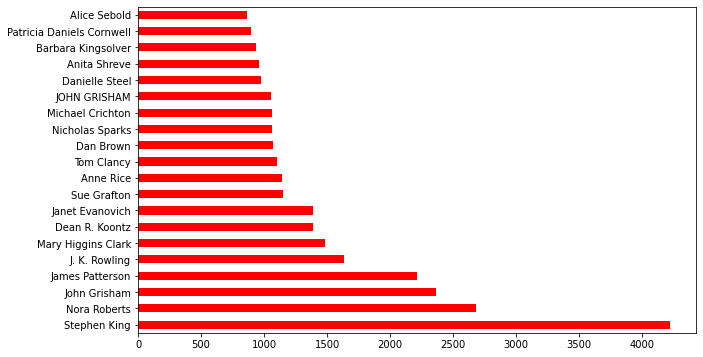

In [230]:
plt.figure(figsize=(10, 6))
books_users['Book-Author'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

### Most rated books

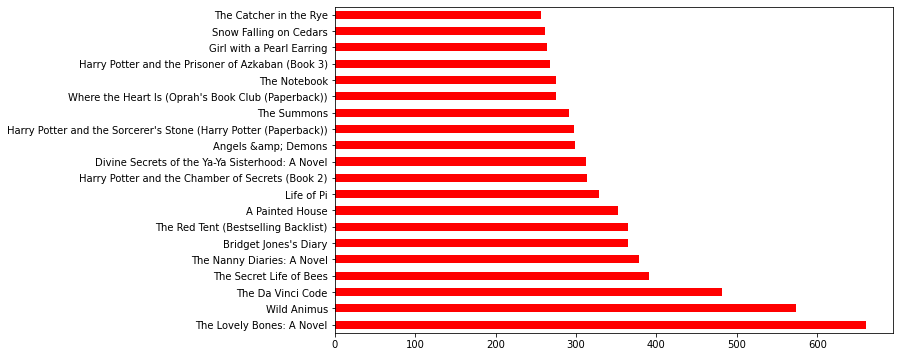

In [231]:
plt.figure(figsize=(10, 6))
books_users['Book-Title'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

In [232]:
PALLETES= ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter']

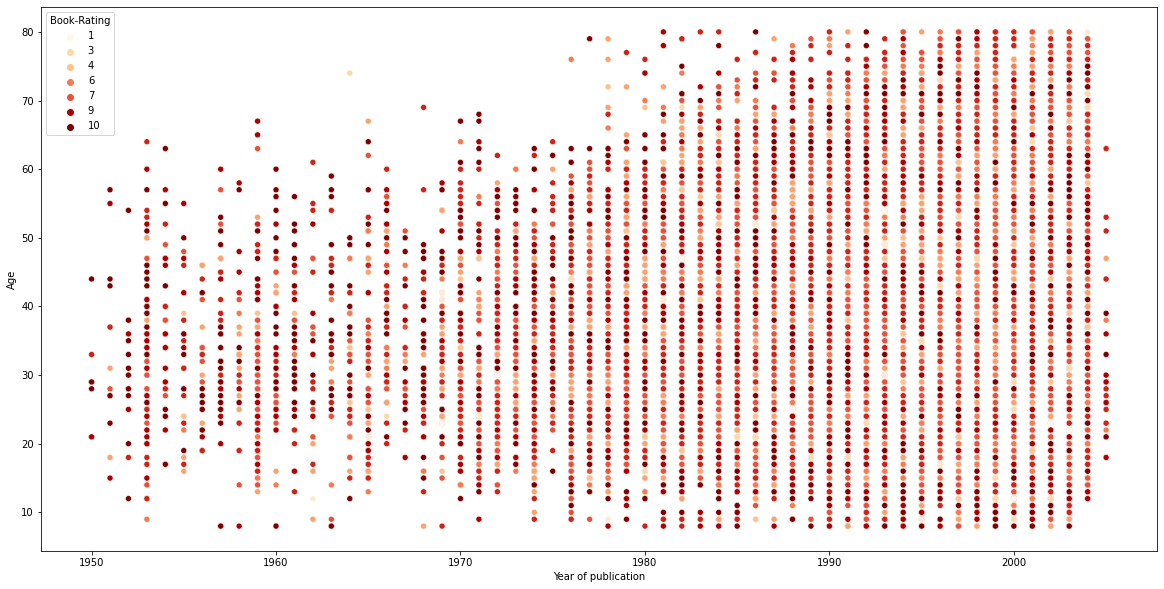

In [233]:
plt.figure(figsize=(20, 10))
sns.scatterplot(y='Age', x='Year-Of-Publication', data=books_users, hue='Book-Rating', palette=PALLETES[20])
plt.xlabel('Year of publication')
plt.ylabel('Age')
plt.show()

# Data engineering

### One hot encoding

In [234]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(books_users[['Country']]).toarray()

In [235]:
# labels = ohe.categories_
# labels = np.array(labels).ravel()

In [236]:
# encoded_country = pd.DataFrame(transformed, columns=labels)

In [237]:
# books_users = pd.concat([encoded_country, books_users], axis=1)

## Imputing NaN values

In [238]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer, KNNImputer

In [239]:
# impute_knn = KNNImputer(n_neighbors=5)
# recommendation.iloc[:,:] = impute_knn.fit_transform(recommendation)

### Dataframe for recommendation

### Drop duplicates

In [240]:
# Drop duplicates
books = books.drop_duplicates(subset=['Title_Author'])

### Select non-object types

In [241]:
# Df for ML
recommendation = books.select_dtypes(['float64', 'int64'])

In [242]:
recommendation

Publishers_frequency  Year-Of-Publication  Book-Average-Rating  \
0                  1.000000                 2004             7.333333   
1                  1.000000                 2000             6.000000   
2                  1.000000                 2000             8.000000   
3                  1.000000                 2000             8.800000   
4                  1.000000                 2003             9.000000   
...                     ...                  ...                  ...   
27248              0.000133                 1976             8.333333   
27249              0.000133                 1996             6.250000   
27250              0.000133                 1999             8.000000   
27251              0.000133                 1995             7.333333   
27252              0.000133                 1997             8.000000   

       Author-Average-Rating  
0                   7.750000  
1                   7.750000  
2                   7.750000  
3                   7.750000  
4                   6.800000  
...                      ...  
27248               8.333333  
27249               6.250000  
27250               8.000000  
27251               7.333333  
27252               8.000000  

[24864 rows x 4 columns]

<AxesSubplot:>

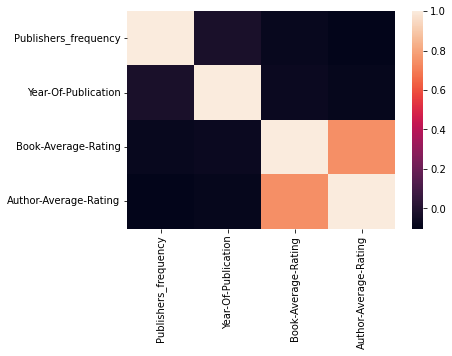

In [243]:
sns.heatmap(recommendation.corr())

### Build a model

In [244]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(recommendation)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


### Predict nearest neighbors

In [245]:
index = books[books['ISBN'] == '0373836023'].index[0]
print(index)
print(recommendation.iloc[index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(recommendation.iloc[index,:].values.reshape(1, -1), n_neighbors = 5)

0
[[1.00000000e+00 2.00400000e+03 7.33333333e+00 7.75000000e+00]]


C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [246]:
# Indexes of nearest books
indices[0]

array([  0, 729, 363, 730, 272], dtype=int64)

### Tkinter application to find books

In [247]:
# Make df to search books info and delete duplicates
find_book = pd.concat([recommendation, books], axis=1)

# Search for nearest books

from tkinter import *
import math

from PIL import Image, ImageTk

# Build tkinter
window = Tk()
window.title('Book recommendation')
window.config(padx=100, pady=50, bg='white', highlightthickness=0)

# Update text after writing
def update(data):
    listbox.delete(0, END)
    for item in data:
        listbox.insert(END, item)
        
def fillout(e):
    entry.delete(0, END)
    entry.insert(0, listbox.get(ANCHOR))

def check(e):
    typed_list = []
    typed = entry.get()
    if typed == '':
        data = result_books
    else:
        data = []
        for item in result_books:
            if typed.lower() in item.lower():
                data.append(item)
                typed_list.append(typed)
    update(data)
    return typed_list[-1]

# Save searched book to txt file and find nearest according to index from indices
def save_book():
    global recommendation
    global books
    
    # Get book and save to txt
    book = entry.get()
    file = open('book_atr.txt', 'w')
    file.write(book)
    file.close()
    window.destroy()
    with open ('book_atr.txt', 'r') as name:
        lines = name.readlines()
    book_name_inside = lines[0]
    
    # Mark ISBN as primary key to find nearest books info
    isbn = books[books['Title_Author'] == book_name_inside]['ISBN'].values.item()
    images_large = []
    book_names = []
    book_authors = []
    
    # Searched book info
    chosen_book = books[books['ISBN'] == isbn]['Title_Author'].values.item()
    
    # Find nearest neighbours
    model_knn.fit(recommendation)
    index = books[books['ISBN'] == isbn].index[0]
    recommendation.iloc[index,:].values.reshape(1,-1)
    distances, indices = model_knn.kneighbors(recommendation.iloc[index,:].values.reshape(1, -1), n_neighbors = 10000)
    recommendation.index[index]
    find_book = pd.concat([recommendation, books], axis=1)
    
    # Print nearest neighbours
    for i in range(6):
        
        
        book_name = books[books.index  == indices[0][i]]['Title_Author'].values.item()
        book_author = books[books.index  == indices[0][i]]['Book-Author'].values.item()
        book_names.append(book_name)
        book_authors.append(book_author)
        
    result = {'Title': [books[books.index  == indices[0][i]]['Book-Title'].values.item() for i in range (6)],
                 'Author': [books[books.index  == indices[0][i]]['Book-Author'].values.item() for i in range (6)],
        'Year of publication': [books[books.index  == indices[0][i]]['Year-Of-Publication'].values.item() for i in range (6)], 
         'Book rating': [books[books.index  == indices[0][i]]['Book-Average-Rating'].values[0].round(1) for i in range (6)],
         'Author rating': [books[books.index  == indices[0][i]]['Author-Average-Rating'].values[0].round(1) for i in range(6)],
                           }
    result = pd.DataFrame(result)
    display(result)

    # Save indices
    np.save('indices.npy', indices) 
# Tkinter features    
## Entries
title = Label(text='What Was the Last Book You Read?', fg='black', font=('Arial', 15, 'bold'), bg='white')
title.grid(column=0, row=0)

entry = Entry(window, font=('Helvetica', 10), width=100)
entry.grid(column=0, row=1)

listbox = Listbox(window, width=100) 
listbox.grid(column=0, row=2)
 
result_books = find_book['Title_Author'].values
update(result_books)

listbox.bind("<<ListboxSelect>>", fillout)
entry.bind("<KeyRelease>", check)

add_btn = Button(text='Search', width=100, command=save_book)
add_btn.grid(column=0, row=3, columnspan=2, sticky='W')

window.mainloop()

C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Title                Author  \
0  Her Bachelor Challenge  (The Deveraux Legacy) ...  Cathy Gillen Thacker   
1                                   Conquer the Mist         Susan Kearney   
2                                       Autumn Lover      Elizabeth Lowell   
3                                          The Eight     KATHERINE NEVILLE   
4  The Prince &amp; The Pregnant Princess  (Deser...         Susan Mallery   
5                         Zero Hour (Power Plays, 7)       Jerome Preisler   

   Year of publication  Book rating  Author rating  
0                 2002          4.3            6.8  
1                 1998          8.7            7.6  
2                 1996          6.9            7.6  
3                 1997          7.7            7.7  
4                 2002          9.5            7.9  
5                 2003          6.5            6.4